# Pandas for Data Analysis: Plotting with Matplotlib, Pandas, and Seaborn

## Outline:

* [Plotting](#Plotting)

https://towardsdatascience.com/a-beginners-guide-to-plotting-fivethrityeight-like-visualizations-5b63d3f3ddd0

In [3]:
import pandas as pd

## Plotting

In [4]:
%matplotlib inline

import gzip
music_review_lines = gzip.open('data/reviews_Digital_Music_5.json.gz', 'rt').readlines()

import json
df = pd.DataFrame(list(map(json.loads, music_review_lines)))

In [5]:
df['unixReviewTime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df['quarter'] = df.unixReviewTime.dt.quarter

กราฟแสดงจำนวนคนที่มารีวีว

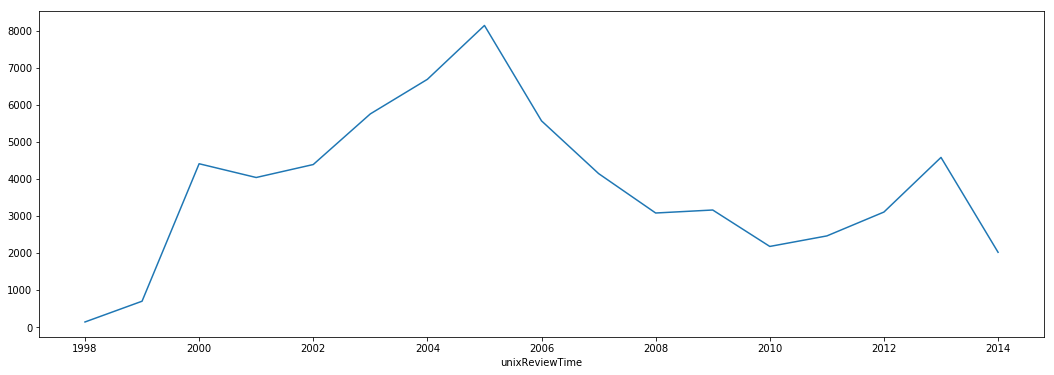

In [6]:
df.groupby(df.unixReviewTime.dt.year)['reviewerID'].count().plot(figsize=(18, 6))

กราฟเปรียบเทียบค่า rating เฉลี่ยในแต่ละวันของอาทิตย์ระหว่างปี 2013 และ 2014

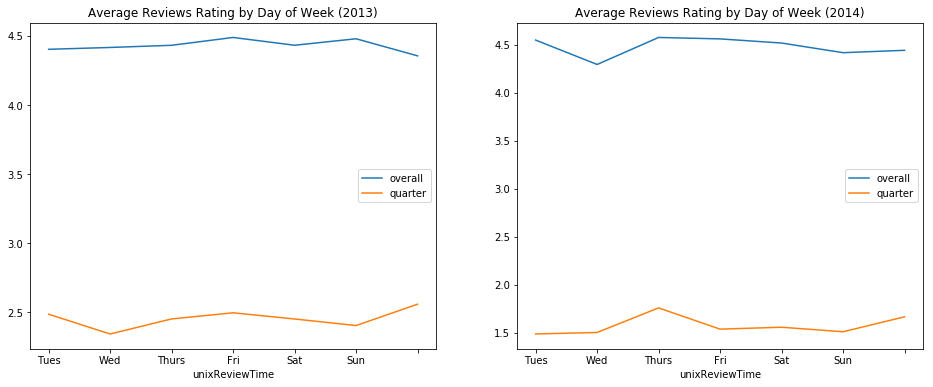

In [7]:
import matplotlib.pyplot as plt

by_weekday = df.groupby([df.unixReviewTime.dt.year, df.unixReviewTime.dt.dayofweek]).mean()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
by_weekday.loc[2013].plot(title='Average Reviews Rating by Day of Week (2013)', ax=ax[0]);
by_weekday.loc[2014].plot(title='Average Reviews Rating by Day of Week (2014)', ax=ax[1]);
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

กราฟเปรียบเทียบจำนวนรีวีวต่อวันของเดือนระหว่างปี 2012, 2013 และ 2014

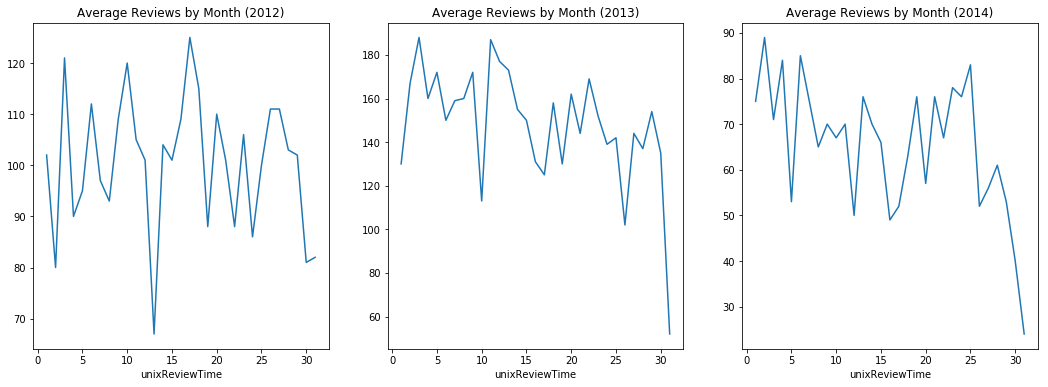

In [8]:
import matplotlib.pyplot as plt

by_month = df.groupby([df.unixReviewTime.dt.year, df.unixReviewTime.dt.day])['reviewerID'].count()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
by_month.loc[2012].plot(title='Average Reviews by Month (2012)', ax=ax[0]);
by_month.loc[2013].plot(title='Average Reviews by Month (2013)', ax=ax[1]);
by_month.loc[2014].plot(title='Average Reviews by Month (2014)', ax=ax[2]);

In [5]:
titanic_data_url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv'
titanic = pd.read_csv(titanic_data_url)

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

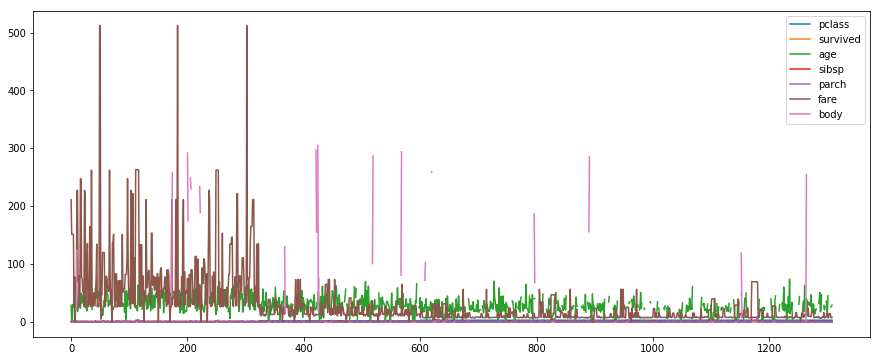

In [7]:
titanic.plot(figsize=(15, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11781c7f0>,
      dtype=object)

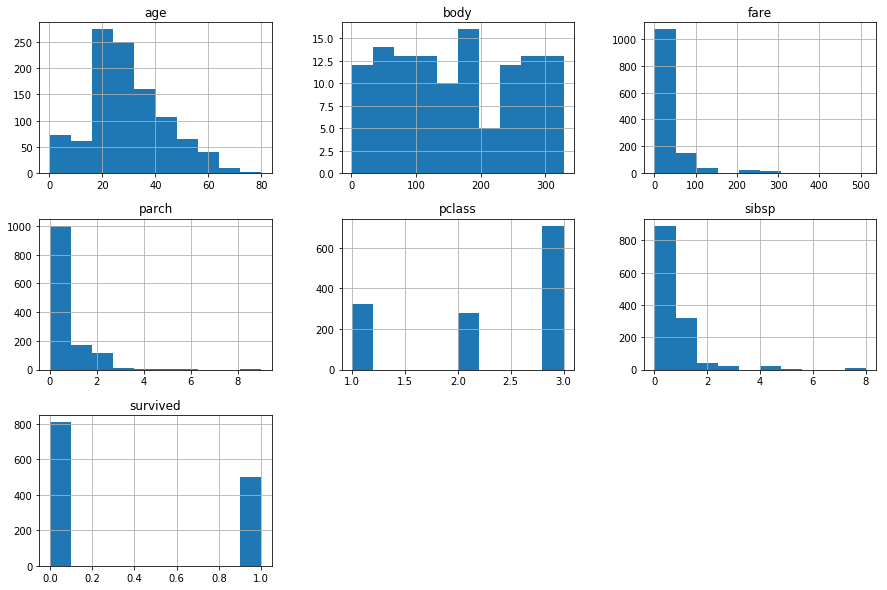

In [8]:
titanic.hist(figsize=(15, 10))

sex
female    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
male      [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

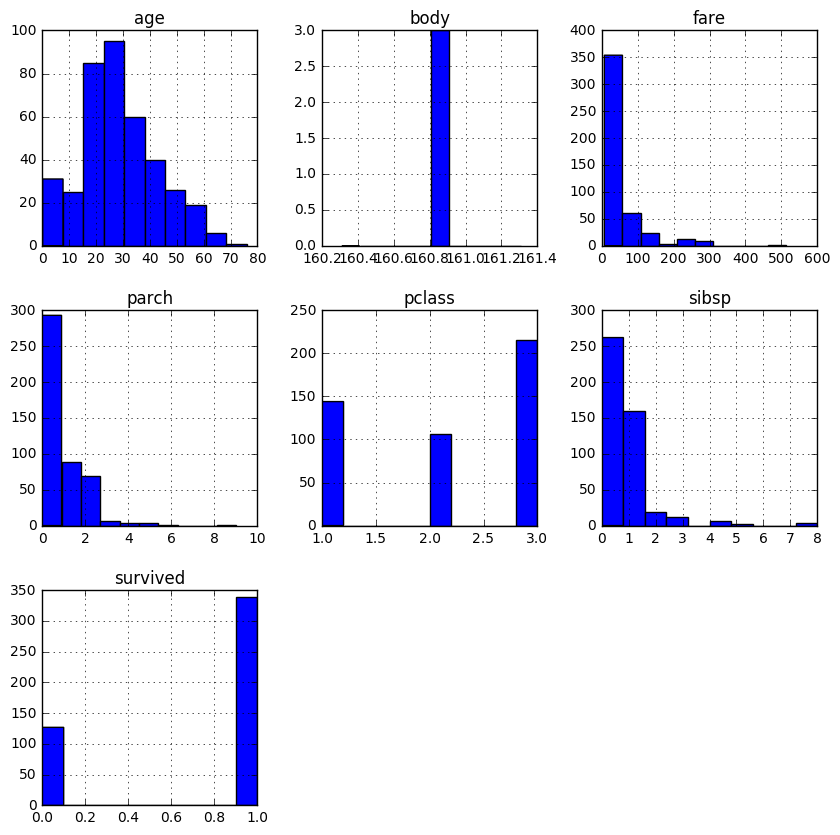

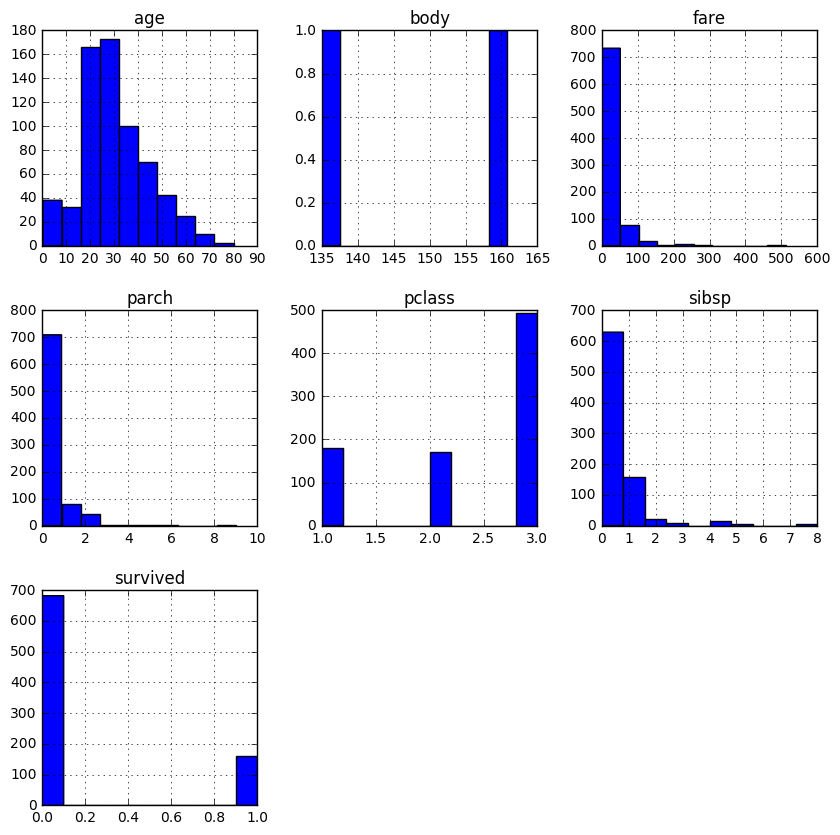

In [75]:
titanic.groupby('sex').hist(figsize=(10, 10))

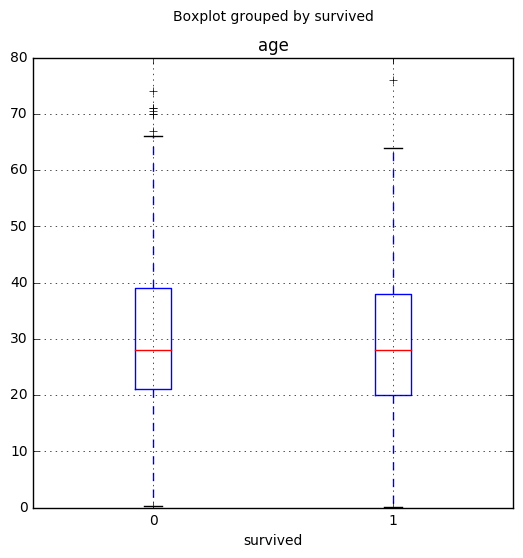

In [76]:
titanic.boxplot(column=['age'], by='survived', figsize=(6, 6))

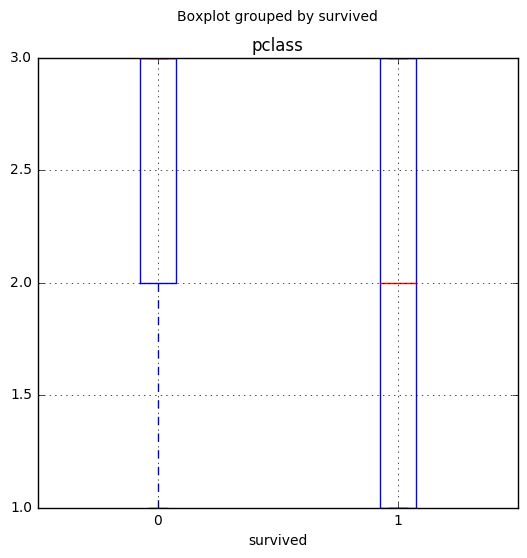

In [77]:
titanic.boxplot(column=['pclass'], by='survived', figsize=(6, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f61db70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121848978>]], dtype=object)

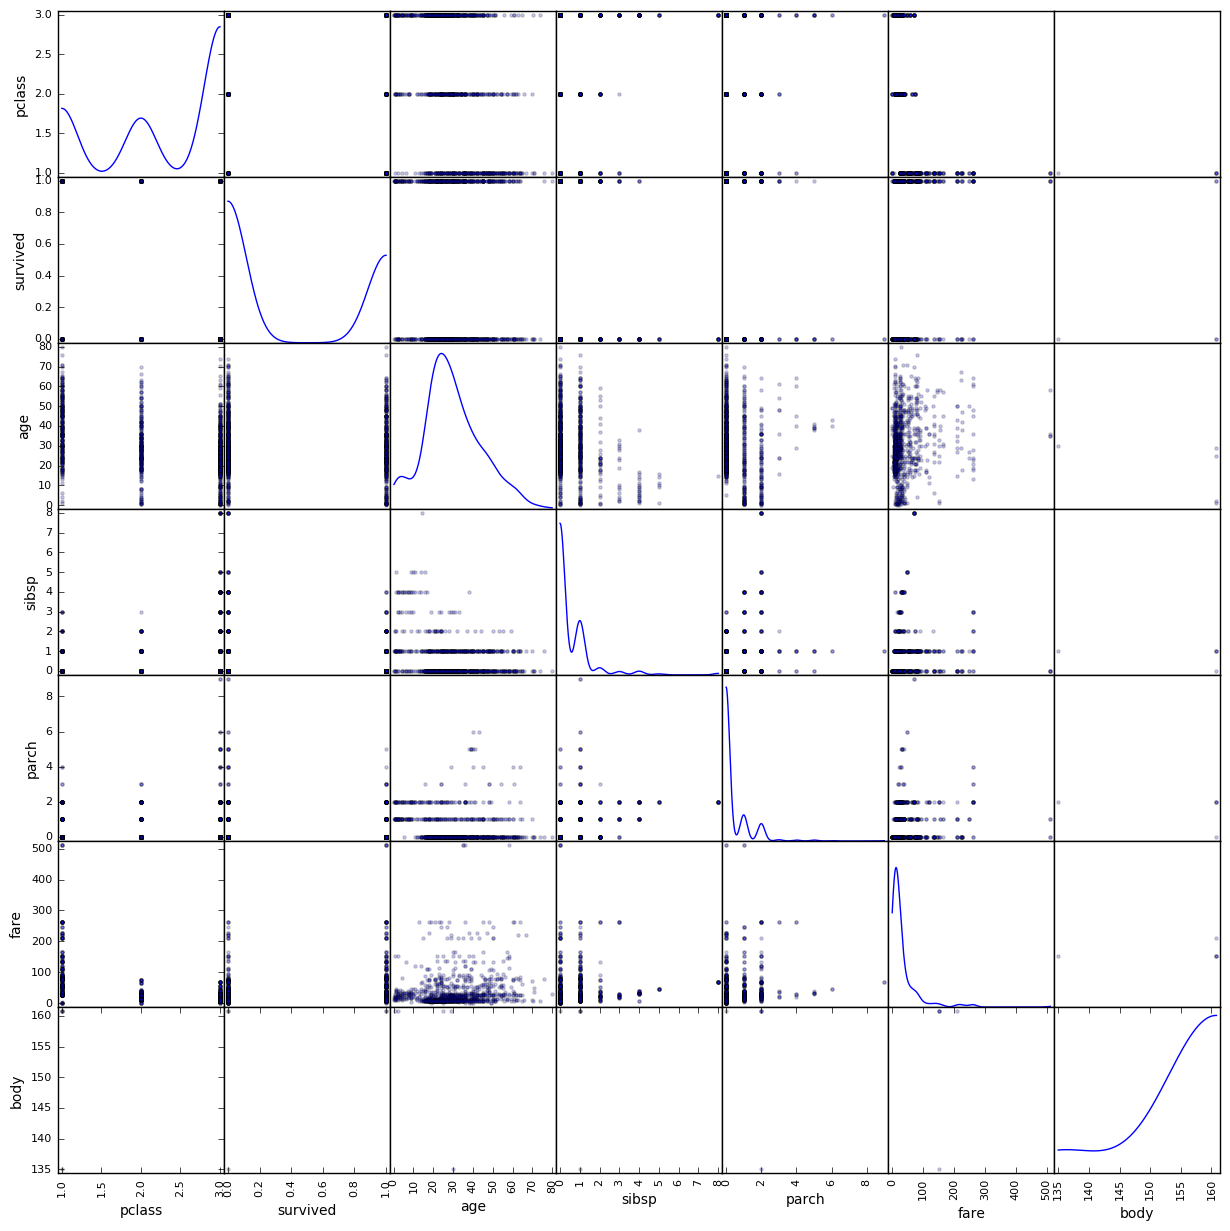

In [78]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(titanic, alpha=0.2, figsize=(15, 15), diagonal='kde')

Run `conda install seaborn` in your terminal to install the [Seaborn: statistical data visualization](https://stanford.edu/~mwaskom/software/seaborn/) package.

In [80]:
import seaborn as sns

/Users/zkan/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


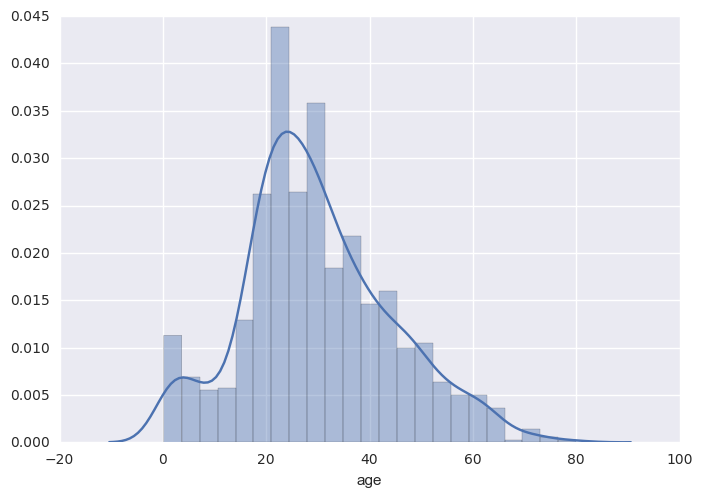

In [81]:
sns.distplot(titanic.age.dropna())

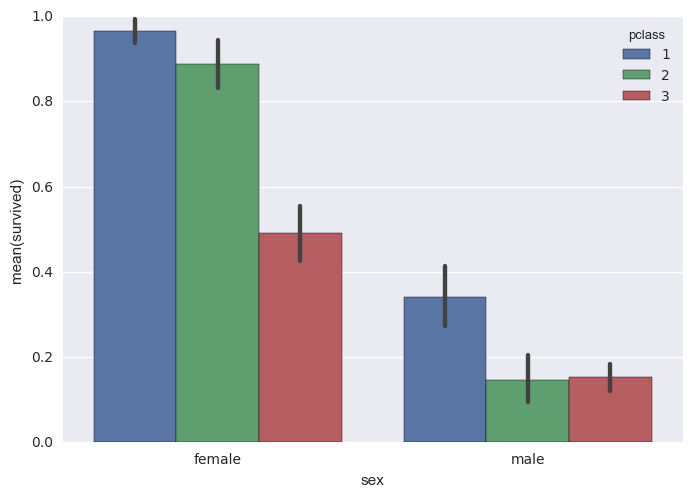

In [82]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic)

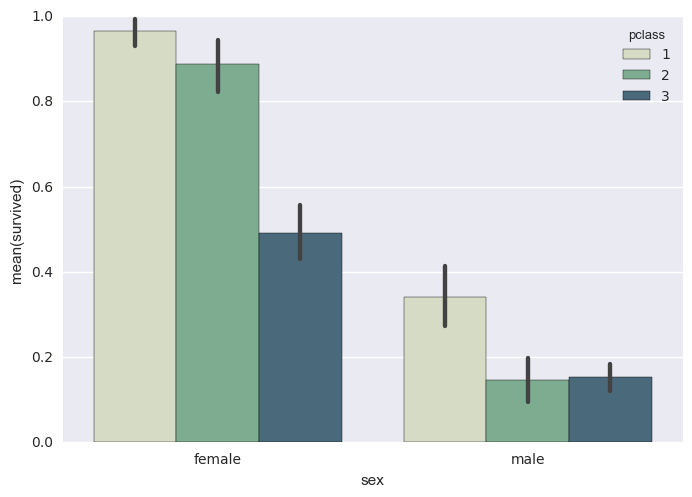

In [83]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic, palette=sns.cubehelix_palette(4, start=0.5, rot=-.75))

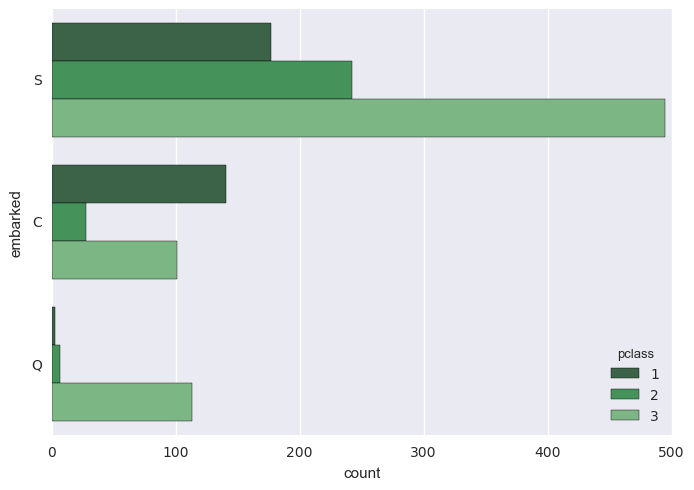

In [84]:
sns.countplot(y="embarked", hue="pclass", data=titanic, palette="Greens_d");

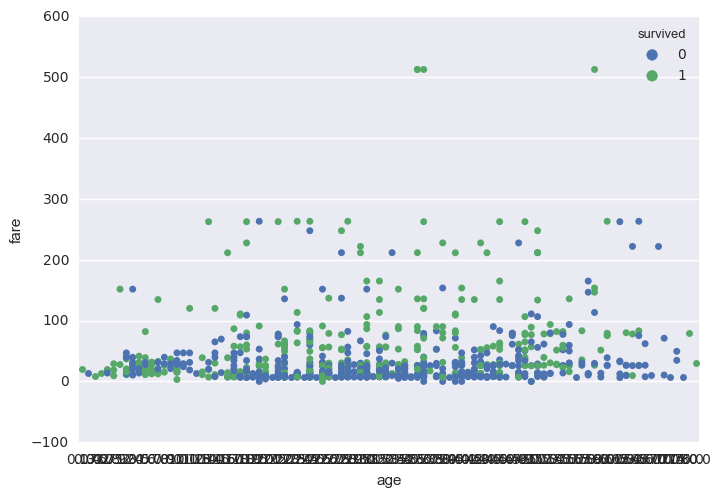

In [85]:
sns.stripplot(x=titanic.age, y=titanic.fare, hue=titanic.survived)

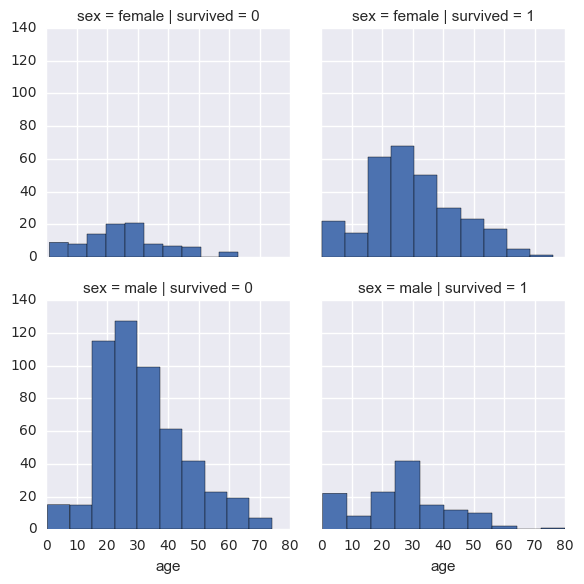

In [86]:
g = sns.FacetGrid(titanic, row="sex", col="survived")
g.map(plt.hist, 'age')

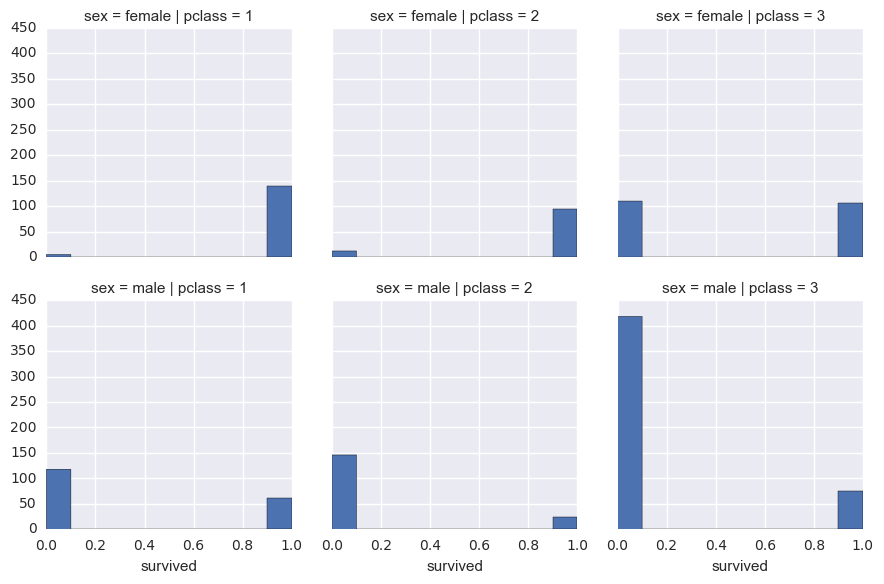

In [87]:
g = sns.FacetGrid(titanic, row="sex", col="pclass")
g.map(plt.hist, 'survived')

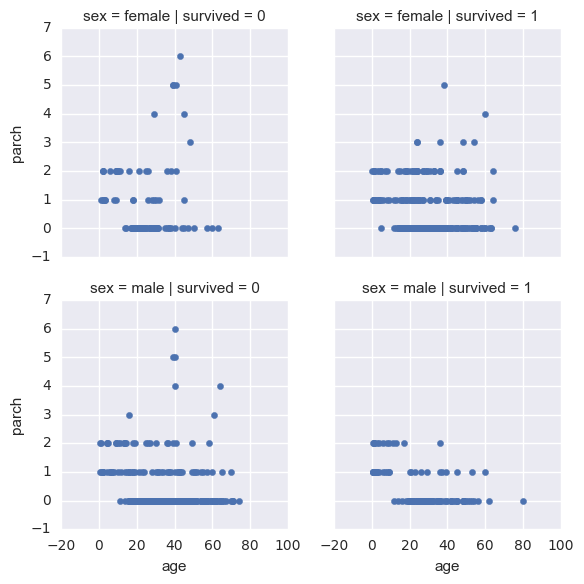

In [88]:
g = sns.FacetGrid(titanic, row="sex", col="survived")
g.map(plt.scatter, 'age', 'parch')

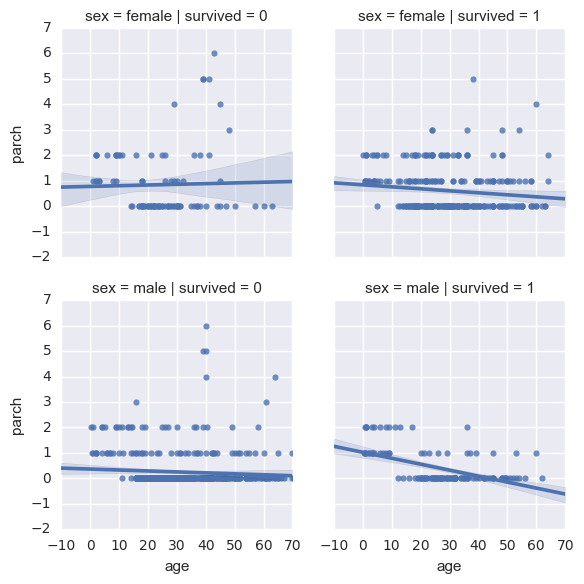

In [89]:
g = sns.FacetGrid(titanic, row="sex", col="survived")
g.map(sns.regplot, 'age', 'parch')